## Observations and Insights 

### Data Merging and Cleaning

In [205]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from numpy import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
CombinedData = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
CombinedData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [110]:
# Checking the number of mice.

NumRows = CombinedData["Mouse ID"].count()
NumMice = CombinedData["Mouse ID"].nunique()
print(f"Total data points in CombinedData = {NumRows}")
print(f"Total mice in CombinedData = {NumMice}")

Total data points in CombinedData = 1893
Total mice in CombinedData = 249


In [111]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

DuplicateMice = CombinedData.loc[CombinedData.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
DuplicateMice

array(['g989'], dtype=object)

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 

DuplicatedData = CombinedData.loc[CombinedData["Mouse ID"].isin(DuplicateMice)]
DuplicatedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [113]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

CleanData = CombinedData.drop(DuplicatedData.index)
CleanData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [114]:
# Checking the number of mice in the clean DataFrame.

NumRows = CleanData["Mouse ID"].count()
NumMice = CleanData["Mouse ID"].nunique()
print(f"Total data points in CleanData = {NumRows}")
print(f"Total mice in CleanData = {NumMice}")

Total data points in CleanData = 1880
Total mice in CleanData = 248


## Summary Statistics

In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Means = CleanData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Medians = CleanData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variances = CleanData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
SDevs = CleanData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEMs = CleanData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

SummaryStatistics1 = pd.DataFrame({
    "Mean": Means,
    "Median": Medians,
    "Variance": Variances,
    "Stnd. Deviation": SDevs,
    "Stnd. Error of Means": SEMs
})

SummaryStatistics1.style.set_caption("Tumor Volume (mm3) Statistics for Each Drug Regimen:")

,Mean,Median,Variance,Stnd. Deviation,Stnd. Error of Means
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

SummaryStatistics2 = CleanData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
SummaryStatistics2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

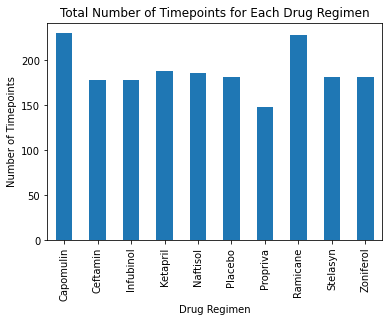

In [117]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

TimeCounts = CleanData.groupby("Drug Regimen")["Timepoint"].count()

TimeCounts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.show()

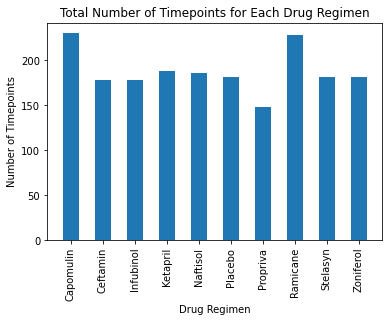

In [118]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

TimeCounts = CleanData.groupby("Drug Regimen")["Timepoint"].count()

plt.bar(TimeCounts.index.values, TimeCounts.values, width=0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Timepoints")
plt.title("Total Number of Timepoints for Each Drug Regimen")
plt.show()

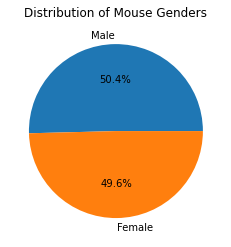

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

MouseGenders = CleanData.drop_duplicates("Mouse ID")["Sex"].value_counts()

MouseGenders.plot(kind="pie", title = "Distribution of Mouse Genders", label="", autopct="%1.1f%%")
plt.show()

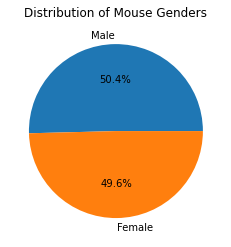

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

MouseGenders = CleanData.drop_duplicates("Mouse ID")["Sex"].value_counts()

plt.pie(MouseGenders.values, labels=MouseGenders.index.values, autopct="%1.1f%%")
plt.title("Distribution of Mouse Genders")
plt.show()

## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
FinalTimepoints = CleanData.groupby("Mouse ID")["Timepoint"].max()
FinalTimepoints = FinalTimepoints.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
EndingData = pd.merge(FinalTimepoints, CleanData, on=["Mouse ID", "Timepoint"], how="left")
EndingData.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [194]:
# Put treatments into a list for for loop (and later for plot labels)
DrugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVolumeList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Drug in DrugList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    FinalTumorSize = EndingData.loc[EndingData["Drug Regimen"] == Drug, "Tumor Volume (mm3)"]
    
    # add subset 
    TumorVolumeList.append(FinalTumorSize)
    
    # Determine outliers using upper and lower bounds
    Quartiles = FinalTumorSize.quantile([0.25, 0.50, 0.75])
    LowerQ = Quartiles[0.25]
    UpperQ = Quartiles[0.75]
    IQR = UpperQ - LowerQ
    LowerBound = LowerQ - (1.5 * IQR)
    UpperBound = UpperQ + (1.5 * IQR)
    Outliers = FinalTumorSize.loc[(FinalTumorSize < LowerBound) | (FinalTumorSize > UpperBound)]
    print(f"{Drug}'s final tumor size outliers:")
    if len(Outliers) == 0:
        print("None")
    else:
        print(Outliers.values)
    print("")

Capomulin's final tumor size outliers:
None

Ramicane's final tumor size outliers:
None

Infubinol's final tumor size outliers:
[36.3213458]

Ceftamin's final tumor size outliers:
None



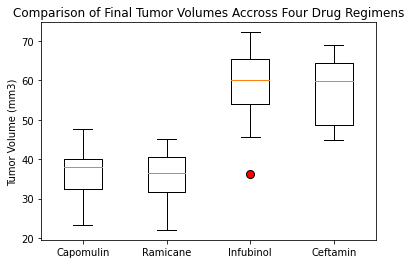

In [187]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(TumorVolumeList, labels=DrugList, flierprops={"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Tumor Volume (mm3)")
plt.title("Comparison of Final Tumor Volumes Accross Four Drug Regimens")
plt.show()

## Line and Scatter Plots

In [233]:
# Generate a table of all mice that were treated with Capomulin
CapomulinData = CleanData.loc[CleanData["Drug Regimen"] == "Capomulin"]
CapomulinData = CapomulinData.reset_index()
CapomulinData = CapomulinData.drop("index", axis=1)
CapomulinData.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,s185,Capomulin,Female,3,17,0,45.000000,0
1,s185,Capomulin,Female,3,17,5,43.878496,0
2,s185,Capomulin,Female,3,17,10,37.614948,0
3,s185,Capomulin,Female,3,17,15,38.177232,0
4,s185,Capomulin,Female,3,17,20,36.866876,0


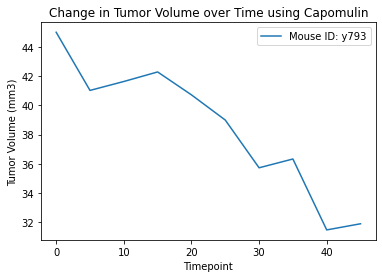

In [285]:
# Generate a line plot of tumor volume vs. time point for a random mouse treated with Capomulin

RandomMouse = CapomulinData.iloc[random.choice(CapomulinData.index), 0]
SingleMouseData = CapomulinData.loc[CapomulinData["Mouse ID"] == RandomMouse]

plt.plot(SingleMouseData["Timepoint"], SingleMouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Change in Tumor Volume over Time using Capomulin")
plt.legend([f"Mouse ID: {RandomMouse}"])
plt.show()

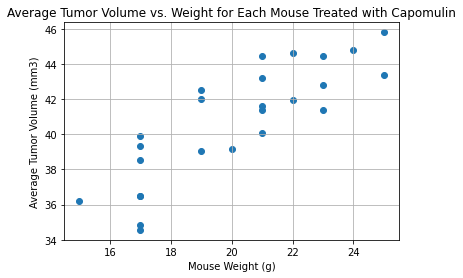

In [275]:
# Generate a scatter plot of average tumor volume per mouse vs. mouse weight for the Capomulin regimen

CapomulinAverage = CapomulinData.groupby("Mouse ID").mean()

plt.scatter(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Each Mouse Treated with Capomulin")
plt.grid()
plt.show()

## Correlation and Regression

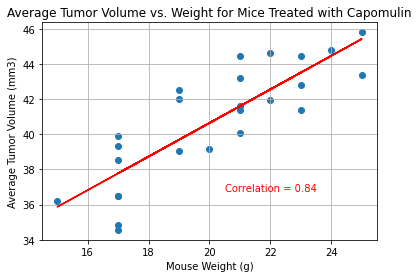

In [284]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation = round(st.pearsonr(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])[0],2)
RegressionData = st.linregress(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])

RegressionYValues = CapomulinAverage["Weight (g)"] * RegressionData[0] + RegressionData[1]

plt.scatter(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Mice Treated with Capomulin")
plt.grid()

plt.plot(CapomulinAverage["Weight (g)"], RegressionYValues, color="red")
plt.annotate(f"Correlation = {Correlation}", xy=(20.5,36.75), color="red")

plt.show()
